<a href="https://colab.research.google.com/github/Dipak22/Case-Studies/blob/master/mnist_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary lib and functions

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
import time
import matplotlib.pyplot as plt

## Load Data

In [2]:
train = torchvision.datasets.MNIST('../../data',
                                   train = True,
                                   download = True,
                                   transform = transforms.Compose([
                                       transforms.ToTensor()
                                   ]))
test = torchvision.datasets.MNIST('../../data',
                                   train = False,
                                   download = True,
                                   transform = transforms.Compose([
                                       transforms.ToTensor()
                                   ]))


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.46MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.56MB/s]


AttributeError: 'MNIST' object has no attribute 'shape'

In [3]:
print(train)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../../data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


torch.Size([1, 28, 28])
5
Image label:  5


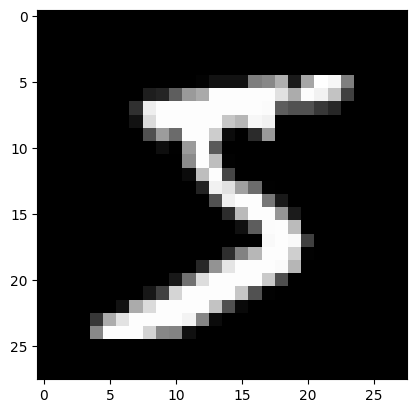

Image label:  0


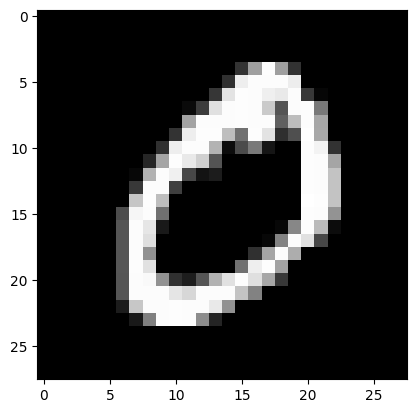

Image label:  4


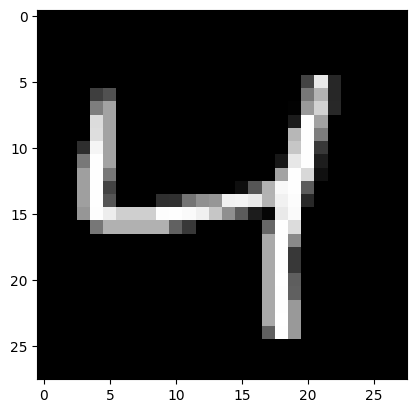

Image label:  1


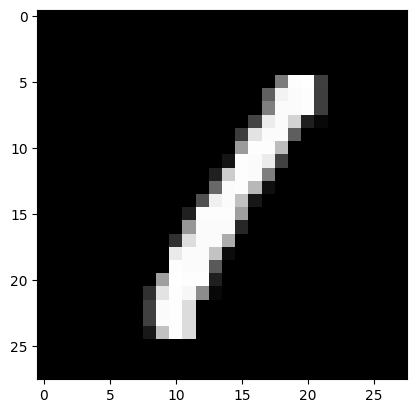

Image label:  9


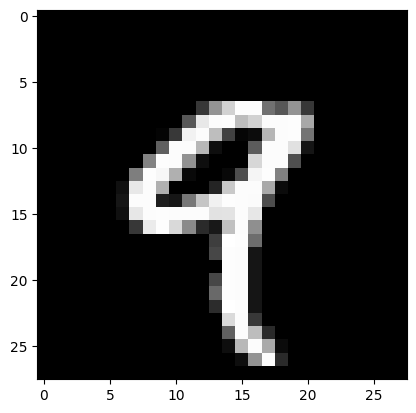

Image label:  2


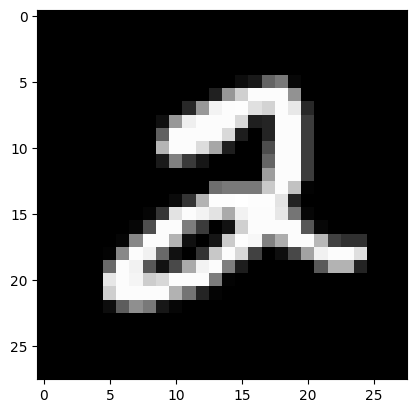

In [6]:
for image, label in train:
  print(image.shape)
  print(label)
  break
counter = 0
for image, label in train:
  if counter ==6:
    break
  image = image.squeeze().numpy()
  print("Image label: ", label)
  plt.imshow(image, cmap = 'gray')
  plt.show()
  counter +=1


## Set Hyper parameters

In [19]:
batch_size = 128
loss_fn = nn.CrossEntropyLoss()
lr = 0.01
epochs = 5

## Build DataLoaders

In [20]:
trainset = torch.utils.data.DataLoader(train, batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=2)
testset = torch.utils.data.DataLoader(test, batch_size=batch_size,
                                      shuffle=False,
                                      num_workers=2)
for images, labels in trainset:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128])


## Define model

In [21]:
class FCNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28* 28, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64,64)
    self.fc4 = nn.Linear(64,10)
  def forward(self,x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    return x

## Training loop

In [22]:
model = FCNet()
optimizer = optim.Adam(model.parameters(), lr = lr)

start = time.time()
for epoch in range(epochs):
  losses = []
  for data in trainset:
    X, y = data
    logits = model(X)
    loss = loss_fn(logits, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"epoch: {epoch+1} loss : {np.mean(losses)}")
print(f"Time on CPU {(time.time() - start):.3f}")

epoch: 1 loss : 0.8521690233302778
epoch: 2 loss : 0.5741359506334577
epoch: 3 loss : 0.5403758499668097
epoch: 4 loss : 0.5317186878434123
epoch: 5 loss : 0.5163413233467257
Time on CPU 44.233


## Evaluate model

In [23]:
correct = 0
total = 0
model.eval()

with torch.inference_mode():
  for data in testset:
    X,y = data
    logits = model(X)
    for idx, i in enumerate(logits):
      if torch.argmax(i) == y[idx]:
        correct +=1
      total +=1
print(f"Accuracy: {(correct/total):.2f}")

Accuracy: 0.79


In [17]:
logits.shape,y

(torch.Size([16, 10]),
 tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6]))